In [107]:
'''
Add imports here as they are required
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [117]:
'''
Import the raw dataset, automatically parse the 'Date' column as a datetime object
'''
dfweather = pd.read_csv('2019_weather_bom.csv', encoding = 'ISO-8859-1', parse_dates = ['Date'], dayfirst = True)
dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               365 non-null    datetime64[ns]
 1   Minimum temperature (C)            359 non-null    float64       
 2   Maximum temperature (C)            361 non-null    float64       
 3   Rainfall (mm)                      364 non-null    float64       
 4   Evaporation (mm)                   0 non-null      float64       
 5   Sunshine (hours)                   0 non-null      float64       
 6   Direction of maximum wind gust     364 non-null    object        
 7   Speed of maximum wind gust (km/h)  364 non-null    float64       
 8   Time of maximum wind gust          364 non-null    object        
 9   9am Temperature (C)                363 non-null    float64       
 10  9am relative humidity (%)          363

In [118]:
dfweather.head()

,Date,Minimum temperature (C),Maximum temperature (C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2019-01-01,11.5,25.2,0.0,NaN,NaN,S,37.0,14:50:00,18.9,...,NaN,NW,7,1013.2,22.3,58.0,NaN,SSE,20,1012.4
1,2019-01-02,15.0,22.7,0.0,NaN,NaN,S,37.0,16:15:00,18.6,...,NaN,S,15,1014.5,21.9,55.0,NaN,SSE,17,1013.8
2,2019-01-03,14.0,27.1,0.0,NaN,NaN,NNE,35.0,12:28:00,19.6,...,NaN,E,7,1012.9,24.3,58.0,NaN,SE,13,1010.6
3,2019-01-04,16.5,44.3,0.0,NaN,NaN,S,54.0,14:04:00,27.0,...,NaN,NNE,9,1004.2,27.7,50.0,NaN,S,37,1001.8
4,2019-01-05,14.4,22.7,0.0,NaN,NaN,S,41.0,15:54:00,16.6,...,NaN,SW,15,1013.2,21.2,38.0,NaN,S,24,1013.0


In [119]:
'''
There are four columns that contain no data, so dropping them off
'''
dfweather.dropna(how='all', axis = 1, inplace=True)
dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               365 non-null    datetime64[ns]
 1   Minimum temperature (C)            359 non-null    float64       
 2   Maximum temperature (C)            361 non-null    float64       
 3   Rainfall (mm)                      364 non-null    float64       
 4   Direction of maximum wind gust     364 non-null    object        
 5   Speed of maximum wind gust (km/h)  364 non-null    float64       
 6   Time of maximum wind gust          364 non-null    object        
 7   9am Temperature (C)                363 non-null    float64       
 8   9am relative humidity (%)          363 non-null    float64       
 9   9am wind direction                 351 non-null    object        
 10  9am wind speed (km/h)              363

In [120]:
'''
The current colum names are descriptive, but unweildly - going to rename them to be a bit easier to manage
'''

new_col_names = ['date', 'mintemp', 'maxtemp', 'rainfall', 'dir_maxgust', 'spd_maxgust', 'time_maxgust', '9am_temp', '9am_rh', '9am_wd', '9am_ws', '9am_mslp', '3pm_temp', '3pm_rh', '3pm_wd', '3pm_ws', '3pm_mslp']
dfweather.columns = new_col_names
dfweather.head()

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp
0,2019-01-01,11.5,25.2,0.0,S,37.0,14:50:00,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4
1,2019-01-02,15.0,22.7,0.0,S,37.0,16:15:00,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8
2,2019-01-03,14.0,27.1,0.0,NNE,35.0,12:28:00,19.6,69.0,E,7,1012.9,24.3,58.0,SE,13,1010.6
3,2019-01-04,16.5,44.3,0.0,S,54.0,14:04:00,27.0,47.0,NNE,9,1004.2,27.7,50.0,S,37,1001.8
4,2019-01-05,14.4,22.7,0.0,S,41.0,15:54:00,16.6,57.0,SW,15,1013.2,21.2,38.0,S,24,1013.0


In [121]:
'''
From here, I'm going to start analysing the NaN values in the dataframe

The reporting below shows that there are 25 rows in the dataframe than have a NaN value in one or more features

I'd prefer to drop any data, so I'm going to look at ways to fill the null values.
'''
dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

dfcheck = dfweather[dfweather.isna().any(axis = 1)] # will probably be using this later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 66 to 347
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          25 non-null     datetime64[ns]
 1   mintemp       19 non-null     float64       
 2   maxtemp       21 non-null     float64       
 3   rainfall      24 non-null     float64       
 4   dir_maxgust   24 non-null     object        
 5   spd_maxgust   24 non-null     float64       
 6   time_maxgust  24 non-null     object        
 7   9am_temp      23 non-null     float64       
 8   9am_rh        23 non-null     float64       
 9   9am_wd        11 non-null     object        
 10  9am_ws        23 non-null     object        
 11  9am_mslp      25 non-null     float64       
 12  3pm_temp      23 non-null     float64       
 13  3pm_rh        23 non-null     float64       
 14  3pm_wd        24 non-null     object        
 15  3pm_ws        25 non-null     object    

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp
66,2019-03-08,11.5,25.3,0.0,S,31.0,14:23:00,15.8,44.0,NaN,Calm,1017.7,23.6,33.0,SE,15,1016.3
67,2019-03-09,12.8,24.1,0.0,S,35.0,16:00:00,18.3,76.0,NaN,Calm,1018.7,22.4,52.0,S,20,1017.6
82,2019-03-24,16.1,31.4,0.8,NW,63.0,22:43:00,18.8,86.0,NaN,Calm,1010.8,29.4,34.0,N,11,1003.0
85,2019-03-27,7.9,22.3,0.0,SSE,30.0,16:04:00,12.3,77.0,NaN,Calm,1024.5,20.7,41.0,N,11,1021.3
90,2019-04-01,12.2,17.2,0.4,SSE,22.0,16:33:00,13.4,72.0,NaN,Calm,1025.7,16.6,56.0,SSE,13,1025.3
91,2019-04-02,5.5,26.0,0.0,NE,22.0,15:20:00,9.4,96.0,NaN,Calm,1026.2,25.3,31.0,N,7,1021.7
137,2019-05-18,4.8,18.8,0.0,SE,19.0,16:12:00,8.0,97.0,NaN,Calm,1030.6,18.4,55.0,E,6,1027.9
138,2019-05-19,6.1,22.6,0.0,NE,24.0,23:59:00,9.5,98.0,NaN,Calm,1028.4,22.1,44.0,NE,15,1024.0
142,2019-05-23,5.7,22.7,0.0,NW,35.0,14:13:00,9.2,98.0,NaN,Calm,1026.0,22.6,43.0,NNW,17,1020.5
158,2019-06-08,2.3,18.4,0.0,WNW,20.0,16:35:00,6.5,97.0,NaN,Calm,1028.8,17.4,58.0,NE,2,1023.0


In [122]:
'''
Going to deal with the missing wind speed values first.

A large portion of the NaN values are in the 9am_wd column - these all match with a 9am_ws listed as 'Calm'.

Going to deal with these with the following logic:

1. All the missing values in 9am_wd have a 9am_ws of Calm - replace NaN in 9am_wd column with 'Calm' (same with 3pm_wd)
2. if the wind direction is listed as 'Calm' and the wind speed is NaN (indices 241 and 245), I will replace the NaN values with 0
3. When these steps are complete, I will replace all wind speed values listed as 'Calm' with 0 (to allow the type of the column to be converted to numeric)
'''

#this section will deal with the missing values
dfweather['9am_wd'].fillna('Calm', inplace = True)
dfweather['3pm_wd'].fillna('Calm', inplace = True)
dfweather['9am_ws'].fillna(0, inplace = True)

#this section will replace 'Calm' in the wind speed columns
dfweather['9am_ws'].replace(['Calm'], 0, inplace = True)
dfweather['3pm_ws'].replace(['Calm'], 0, inplace = True)

#finally convert the wind speed columns to numeric
dfweather['9am_ws'] = pd.to_numeric(dfweather['9am_ws'])
dfweather['3pm_ws'] = pd.to_numeric(dfweather['3pm_ws'])

#while I'm tidying up data types, I may as well tidy up the 'time_maxgust' column
dfweather['time_maxgust'] = pd.to_datetime(dfweather['time_maxgust'], format = '%H:%M:%S').dt.time

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 210 to 347
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          9 non-null      datetime64[ns]
 1   mintemp       3 non-null      float64       
 2   maxtemp       5 non-null      float64       
 3   rainfall      8 non-null      float64       
 4   dir_maxgust   8 non-null      object        
 5   spd_maxgust   8 non-null      float64       
 6   time_maxgust  8 non-null      object        
 7   9am_temp      7 non-null      float64       
 8   9am_rh        7 non-null      float64       
 9   9am_wd        9 non-null      object        
 10  9am_ws        9 non-null      int64         
 11  9am_mslp      9 non-null      float64       
 12  3pm_temp      7 non-null      float64       
 13  3pm_rh        7 non-null      float64       
 14  3pm_wd        9 non-null      object        
 15  3pm_ws        9 non-null      int64     

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp
210,2019-07-30,5.7,NaN,0.8,SSW,28.0,01:21:00,8.4,95.0,SE,6,1029.1,10.5,68.0,SSE,13,1029.5
297,2019-10-25,NaN,22.7,0.0,WNW,70.0,05:00:00,15.3,80.0,WNW,17,1005.2,20.5,34.0,W,20,1003.6
307,2019-11-04,NaN,NaN,0.4,W,56.0,18:01:00,NaN,NaN,NW,9,1015.0,11.9,95.0,S,13,1015.0
308,2019-11-05,NaN,18.9,4.2,WNW,41.0,13:26:00,10.1,84.0,WNW,17,1020.6,NaN,NaN,WNW,19,1016.3
327,2019-11-24,NaN,21.6,0.0,S,35.0,13:57:00,15.2,64.0,ESE,4,1018.6,19.6,53.0,S,28,1014.6
336,2019-12-03,9.6,NaN,0.2,W,70.0,13:10:00,13.5,92.0,WNW,26,1004.7,18.7,59.0,W,37,1005.0
337,2019-12-04,NaN,22.1,0.4,W,52.0,11:43:00,NaN,NaN,WNW,19,1011.4,20.7,41.0,W,28,1010.2
346,2019-12-13,8.9,NaN,0.0,WSW,39.0,14:32:00,14.0,67.0,WNW,9,1019.0,NaN,NaN,WSW,26,1015.8
347,2019-12-14,NaN,21.6,NaN,NaN,NaN,NaT,16.9,79.0,W,24,1014.8,19.7,67.0,SW,15,1013.7


In [123]:
'''
For the most part I'm going to look at filling other missing values based on the mean or median for the month. 

There is another way we could do this using an imputer in sklearn - in particular I'm thinking of using the multivariate imputer (IterativeImputer) as the dataset is reasonably complete and each observation with missing values is only missing 2 or 3
features.  We're taking a snapshot of the current datafram here to try with the imputer later and compare.

Starting by looking at the various temperature columns
'''
dfweather['month'] = pd.DatetimeIndex(dfweather['date']).month
dfweather_imputer = dfweather.copy()
dfweather.head()
#print(id(dfweather))
#print(id(dfweather_imputer))


,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp,month
0,2019-01-01,11.5,25.2,0.0,S,37.0,14:50:00,18.9,70.0,NW,7,1013.2,22.3,58.0,SSE,20,1012.4,1
1,2019-01-02,15.0,22.7,0.0,S,37.0,16:15:00,18.6,68.0,S,15,1014.5,21.9,55.0,SSE,17,1013.8,1
2,2019-01-03,14.0,27.1,0.0,NNE,35.0,12:28:00,19.6,69.0,E,7,1012.9,24.3,58.0,SE,13,1010.6,1
3,2019-01-04,16.5,44.3,0.0,S,54.0,14:04:00,27.0,47.0,NNE,9,1004.2,27.7,50.0,S,37,1001.8,1
4,2019-01-05,14.4,22.7,0.0,S,41.0,15:54:00,16.6,57.0,SW,15,1013.2,21.2,38.0,S,24,1013.0,1


In [ ]:
# sns.pairplot(dfweather)

,min,max,mean,median
month,,,,
1,8.9,21.6,15.345161,15.20
2,9.7,18.9,14.403571,14.10
3,6.9,21.6,13.590323,13.40
4,3.5,20.8,10.426667,10.05
5,4.3,14.7,8.654839,8.80
6,0.3,11.9,6.713333,7.25
7,3.5,10.8,7.258065,7.30
8,0.8,10.9,6.277419,6.20
9,2.0,14.2,7.513333,7.35


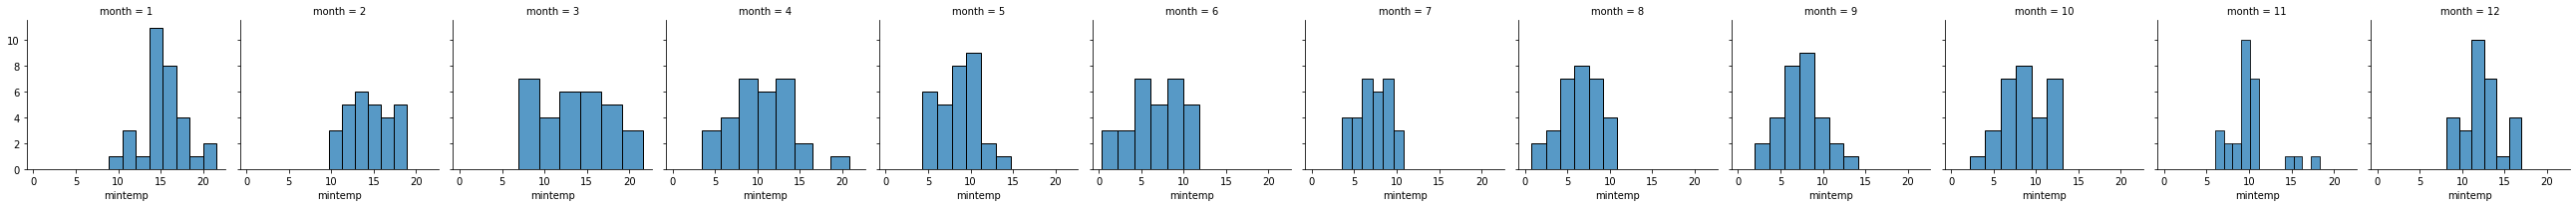

In [124]:
'''
Looking at the mintemp column, it might make sense to fill null values with some measure of the average for the current month to attempt to account for any monthly seasonal variation.

Table shows that thre is only a small difference in mean and median temperatures for a month, mintemp distributions by month look like they might suggest median a better fit.

Another way to look at this would be to explore the relationship between min/max temp and 9am/3pm temp.

Uncomment the above cell and have a look - it shows some interseting correlations between the temperatures (the multivariate imputers in sklearn would likely take these correlations into account)
'''

hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, 'mintemp')

display(dfweather.groupby('month')['mintemp'].agg(['min', 'max', 'mean', 'median']))

,min,max,mean,median
month,,,,
1,21.3,44.3,28.122581,25.70
2,19.4,39.9,26.221429,24.60
3,16.8,39.3,25.125806,24.10
4,15.5,33.3,22.096667,21.95
5,9.6,24.2,17.800000,17.60
6,10.5,19.1,14.863333,14.80
7,12.1,18.0,14.670000,14.65
8,9.8,19.6,14.412903,14.00
9,13.0,23.8,17.203333,16.70


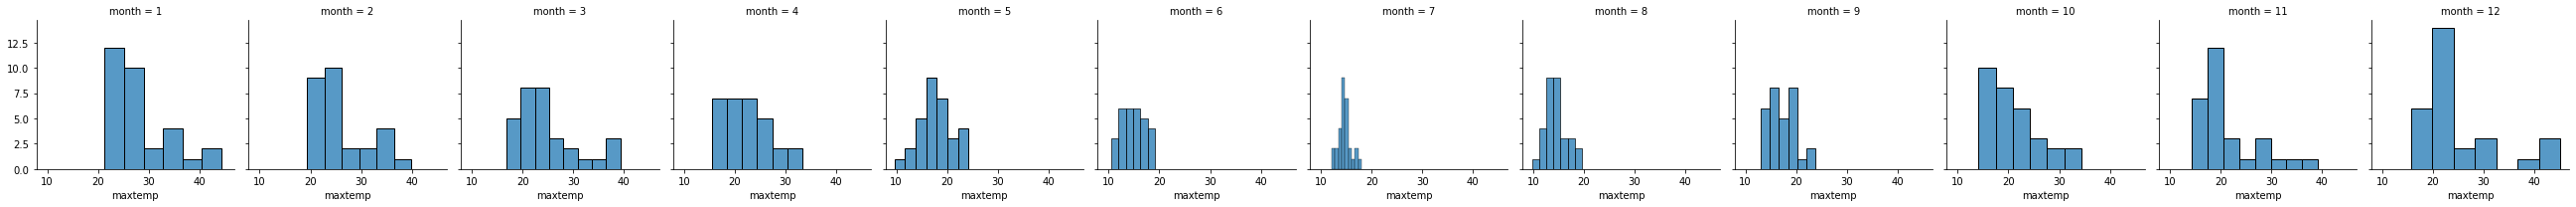

In [125]:
'''
Distributions by month for maxtemp suggest median maxtemp is a better fit for missing values
'''
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, 'maxtemp')

display(dfweather.groupby('month')['maxtemp'].agg(['min', 'max', 'mean', 'median']))

,min,max,mean,median
month,,,,
1,16.5,37.1,20.332258,19.40
2,12.8,23.2,18.146429,18.00
3,9.1,26.6,17.209677,16.80
4,9.4,22.5,15.060000,14.50
5,7.2,17.7,12.003226,12.60
6,2.4,14.8,9.213333,10.10
7,6.6,12.9,10.061290,10.10
8,6.2,14.5,9.638710,9.40
9,9.0,18.6,12.026667,11.15


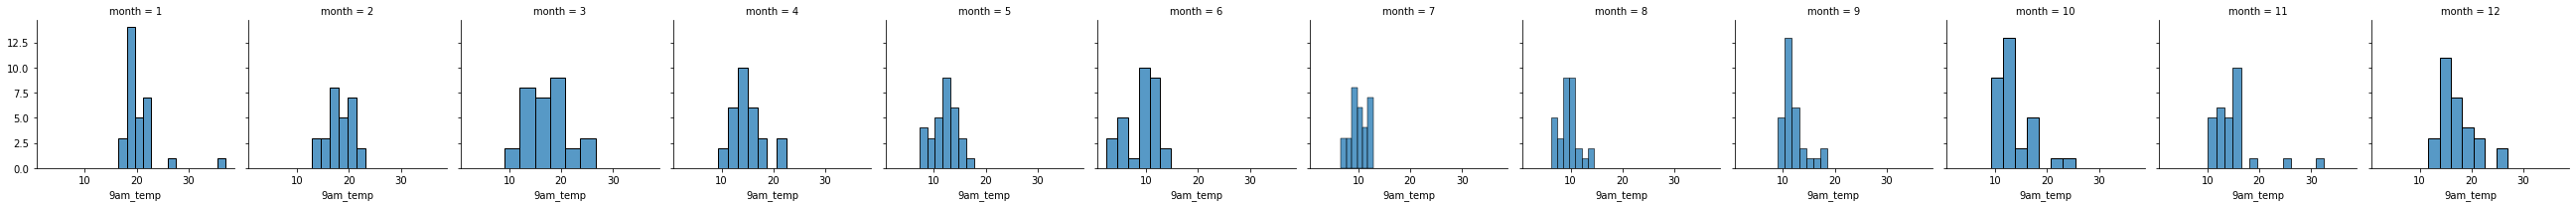

In [126]:
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, '9am_temp')

display(dfweather.groupby('month')['9am_temp'].agg(['min', 'max', 'mean', 'median']))

,min,max,mean,median
month,,,,
1,19.8,35.1,24.893548,23.50
2,18.4,38.6,24.121429,22.30
3,16.0,37.6,23.567742,22.40
4,14.4,32.1,20.750000,19.70
5,6.8,22.8,16.919355,16.90
6,9.5,18.5,13.846667,13.80
7,8.7,16.8,13.496774,13.80
8,8.2,19.4,12.906452,12.90
9,10.7,22.9,15.143333,14.45


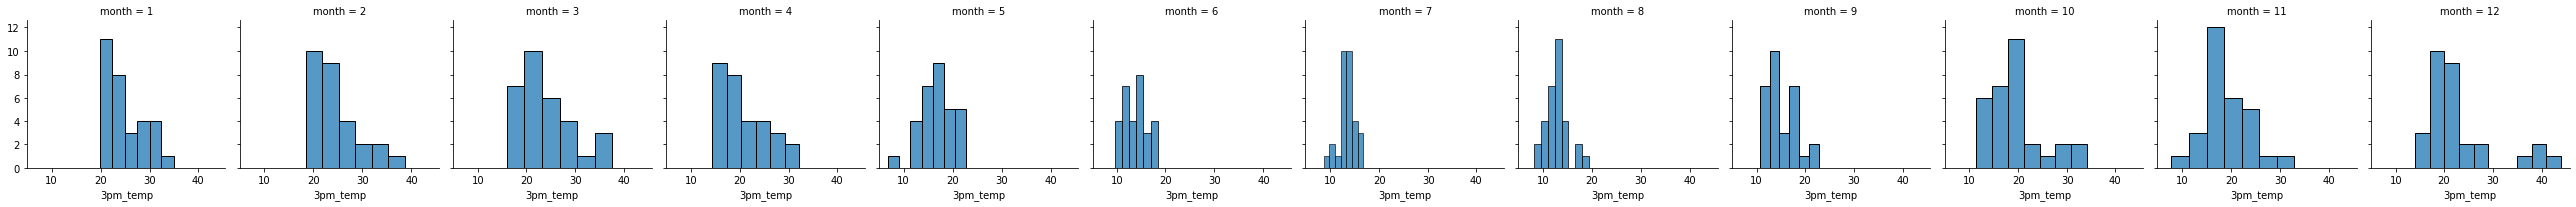

In [127]:
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, '3pm_temp')
display(dfweather.groupby('month')['3pm_temp'].agg(['min', 'max', 'mean', 'median']))

In [128]:
'''
From all of the above plots for the different temperature, it looks like the median temperature for the month might be a better fit to replace null values in each of the temperature features
'''

temp_cols = ['mintemp', 'maxtemp', '9am_temp', '3pm_temp']

for col in temp_cols:
    dfweather[col] = dfweather[col].fillna(dfweather.groupby('month')[col].transform('median'))

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 307 to 347
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5 non-null      datetime64[ns]
 1   mintemp       5 non-null      float64       
 2   maxtemp       5 non-null      float64       
 3   rainfall      4 non-null      float64       
 4   dir_maxgust   4 non-null      object        
 5   spd_maxgust   4 non-null      float64       
 6   time_maxgust  4 non-null      object        
 7   9am_temp      5 non-null      float64       
 8   9am_rh        3 non-null      float64       
 9   9am_wd        5 non-null      object        
 10  9am_ws        5 non-null      int64         
 11  9am_mslp      5 non-null      float64       
 12  3pm_temp      5 non-null      float64       
 13  3pm_rh        3 non-null      float64       
 14  3pm_wd        5 non-null      object        
 15  3pm_ws        5 non-null      int64     

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp,month
307,2019-11-04,9.8,20.2,0.4,W,56.0,18:01:00,14.20,NaN,NW,9,1015.0,11.90,95.0,S,13,1015.0,11
308,2019-11-05,9.8,18.9,4.2,WNW,41.0,13:26:00,10.10,84.0,WNW,17,1020.6,17.60,NaN,WNW,19,1016.3,11
337,2019-12-04,12.3,22.1,0.4,W,52.0,11:43:00,16.25,NaN,WNW,19,1011.4,20.70,41.0,W,28,1010.2,12
346,2019-12-13,8.9,22.1,0.0,WSW,39.0,14:32:00,14.00,67.0,WNW,9,1019.0,20.55,NaN,WSW,26,1015.8,12
347,2019-12-14,12.3,21.6,NaN,NaN,NaN,NaT,16.90,79.0,W,24,1014.8,19.70,67.0,SW,15,1013.7,12


Results for 9am_rh:


,min,max,mean,median
month,,,,
1,29.0,97.0,71.419355,69.0
2,52.0,97.0,73.928571,72.0
3,34.0,99.0,76.806452,79.0
4,50.0,96.0,77.200000,80.0
5,66.0,98.0,88.677419,93.0
6,65.0,97.0,91.633333,95.0
7,61.0,97.0,87.838710,93.0
8,45.0,97.0,85.838710,93.0
9,36.0,97.0,81.666667,91.0


Results for 3pm_rh:


,min,max,mean,median
month,,,,
1,27.0,86.0,51.064516,50.0
2,14.0,85.0,48.178571,48.5
3,17.0,93.0,49.000000,46.0
4,16.0,77.0,48.033333,50.5
5,39.0,93.0,61.225806,60.0
6,40.0,96.0,73.400000,73.0
7,48.0,93.0,68.645161,68.0
8,40.0,94.0,67.548387,67.0
9,42.0,93.0,66.266667,63.5


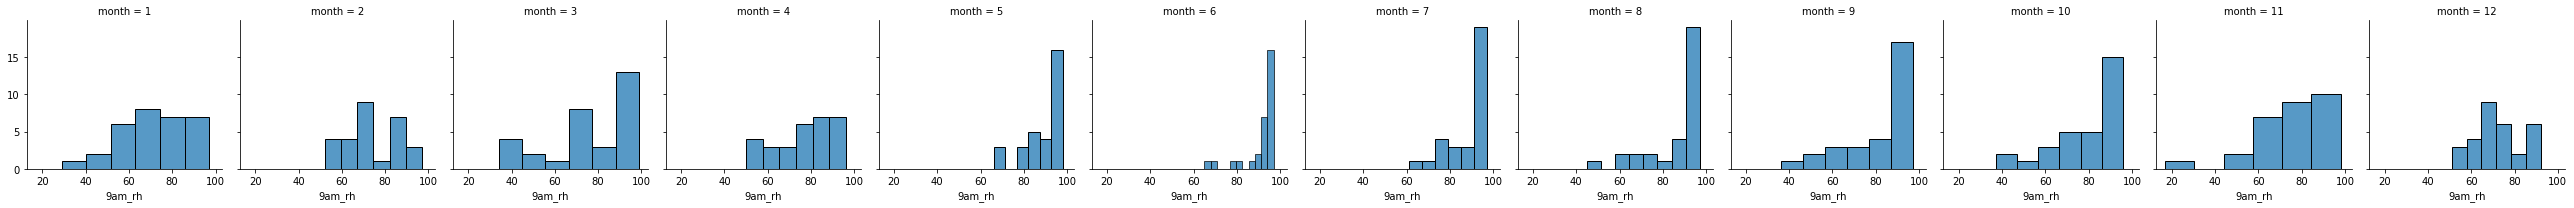

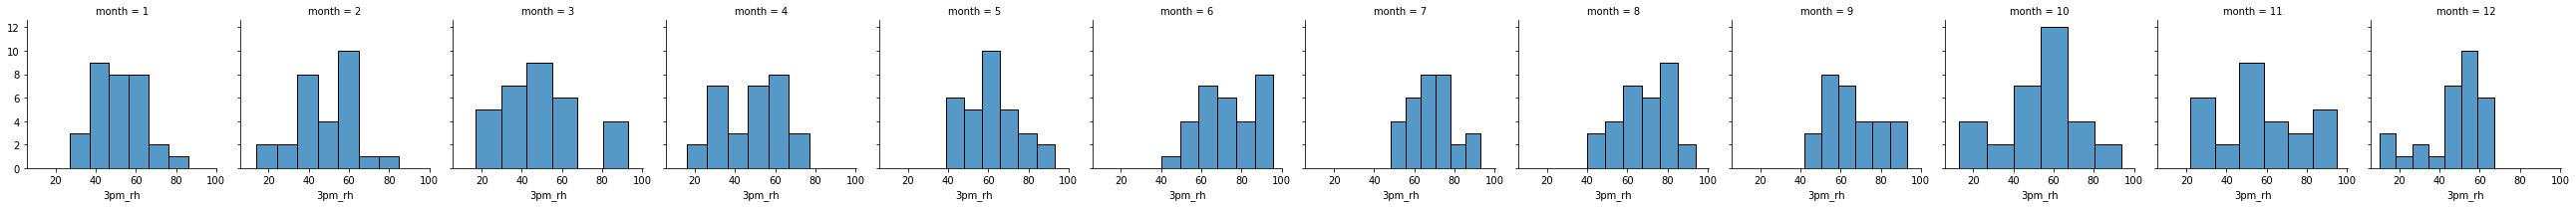

In [129]:
'''
Going to look at the relative humidity columns next.

There are two missing values in each of the 9am_rh and the 3pm_rh columns.

Again, from the reports below, it looks there is a definite skew to the monthly distributions for the humidity data, going to replace the missing values with the median for the relevant month
'''

rh_cols = ['9am_rh', '3pm_rh']

for rh_col in rh_cols:
    hist_grid = sns.FacetGrid(dfweather, col = 'month')
    hist_grid.map(sns.histplot, rh_col)
    print('Results for {}:'.format(rh_col))
    display(dfweather.groupby('month')[rh_col].agg(['min', 'max', 'mean', 'median']))

In [130]:
for rh_col in rh_cols:
    dfweather[rh_col] = dfweather[rh_col].fillna(dfweather.groupby('month')[rh_col].transform('median'))

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 347 to 347
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1 non-null      datetime64[ns]
 1   mintemp       1 non-null      float64       
 2   maxtemp       1 non-null      float64       
 3   rainfall      0 non-null      float64       
 4   dir_maxgust   0 non-null      object        
 5   spd_maxgust   0 non-null      float64       
 6   time_maxgust  0 non-null      object        
 7   9am_temp      1 non-null      float64       
 8   9am_rh        1 non-null      float64       
 9   9am_wd        1 non-null      object        
 10  9am_ws        1 non-null      int64         
 11  9am_mslp      1 non-null      float64       
 12  3pm_temp      1 non-null      float64       
 13  3pm_rh        1 non-null      float64       
 14  3pm_wd        1 non-null      object        
 15  3pm_ws        1 non-null      int64     

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp,month
347,2019-12-14,12.3,21.6,NaN,NaN,NaN,NaT,16.9,79.0,W,24,1014.8,19.7,67.0,SW,15,1013.7,12


In [131]:
'''
Last row!!

Taking some creative license with this row - determined to not delete any data....

1. For dir_maxgust - windspeed in teh morning was stronger than at 3pm, will set the direction for the maxgust to the direction of the 9am_wd
2. rainfall, spd_maxgust - will take the median for the month
3. time_maxgust - will have a look at a time bucket histogram if I can make one...
'''

#part 1
dfweather['dir_maxgust'].fillna('W', inplace = True)

#Part 2
cols = ['rainfall', 'spd_maxgust']
for col in cols:
    dfweather[col] = dfweather[col].fillna(dfweather.groupby('month')[col].transform('median'))
    
dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 347 to 347
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1 non-null      datetime64[ns]
 1   mintemp       1 non-null      float64       
 2   maxtemp       1 non-null      float64       
 3   rainfall      1 non-null      float64       
 4   dir_maxgust   1 non-null      object        
 5   spd_maxgust   1 non-null      float64       
 6   time_maxgust  0 non-null      object        
 7   9am_temp      1 non-null      float64       
 8   9am_rh        1 non-null      float64       
 9   9am_wd        1 non-null      object        
 10  9am_ws        1 non-null      int64         
 11  9am_mslp      1 non-null      float64       
 12  3pm_temp      1 non-null      float64       
 13  3pm_rh        1 non-null      float64       
 14  3pm_wd        1 non-null      object        
 15  3pm_ws        1 non-null      int64     

,date,mintemp,maxtemp,rainfall,dir_maxgust,spd_maxgust,time_maxgust,9am_temp,9am_rh,9am_wd,9am_ws,9am_mslp,3pm_temp,3pm_rh,3pm_wd,3pm_ws,3pm_mslp,month
347,2019-12-14,12.3,21.6,0.0,W,39.0,NaT,16.9,79.0,W,24,1014.8,19.7,67.0,SW,15,1013.7,12


Median time for a max gust of wind is 14


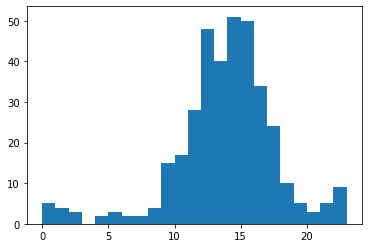

In [132]:
lstHour = [time.hour for time in dfweather['time_maxgust']]

h_bins = [x for x in range(0,24)]
plt.hist(lstHour, bins = h_bins)

print('Median time for a max gust of wind is {}'.format(statistics.median(lstHour)))


In [134]:
'''
Given the above histogram, going to set the missing time as 14:00:00
'''

dfweather['time_maxgust'].fillna('14:00:00', inplace = True)
dfweather['time_maxgust'] = pd.to_datetime(dfweather['time_maxgust'], format = '%H:%M:%S').dt.time
dfweather[dfweather.isna().any(axis = 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          0 non-null      datetime64[ns]
 1   mintemp       0 non-null      float64       
 2   maxtemp       0 non-null      float64       
 3   rainfall      0 non-null      float64       
 4   dir_maxgust   0 non-null      object        
 5   spd_maxgust   0 non-null      float64       
 6   time_maxgust  0 non-null      object        
 7   9am_temp      0 non-null      float64       
 8   9am_rh        0 non-null      float64       
 9   9am_wd        0 non-null      object        
 10  9am_ws        0 non-null      int64         
 11  9am_mslp      0 non-null      float64       
 12  3pm_temp      0 non-null      float64       
 13  3pm_rh        0 non-null      float64       
 14  3pm_wd        0 non-null      object        
 15  3pm_ws        0 non-null      int64         
 16  3p

In [137]:
dfweather.to_csv('geelong_weather_2019_bom_cleaned.csv')

In [ ]:
'''
Fin
'''